In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
# Read and upload data
data = pd.read_csv("assignment5.csv")

In [5]:
data.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G,Column1
0,D-1/3/90,44101.0,1.5,7.8,?,407,166.0,66.3,4.5,2110,...,2000.0,?,58.8,95.5,?,70,?,79.4,87.3,99.6
1,D-2/3/90,39024.0,3,7.7,?,443,214.0,69.2,6.5,2660,...,2590.0,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229.0,5,7.6,?,528,186.0,69.9,3.4,1666,...,1888.0,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023.0,3.5,7.9,205,588,192.0,65.6,4.5,2430,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924.0,1.5,8.0,242,496,176.0,64.8,4,2110,...,2120.0,?,62.7,95.6,?,71,92.1,78.2,87.5,99.5


In [6]:
data.isnull().sum()

Q-E          0
ZN-E        18
PH-E         0
DBO-E        0
DQO-E        0
SS-E         0
SSV-E        1
SED-E        0
COND-E       0
PH-P         0
DBO-P        0
SS-P         0
SSV-P        0
SED-P        0
COND-P       0
PH-D         0
DBO-D        0
DQO-D        0
SS-D         0
SSV-D        0
SED-D        0
COND-D       0
PH-S         0
DBO-S        1
DQO-S        0
SS-S         0
SSV-S        0
SED-S        0
COND-S       0
RD-DBO-P     1
RD-SS-P      0
RD-SED-P     0
RD-DBO-S     0
RD-DQO-S     0
RD-DBO-G     0
RD-DQO-G     0
RD-SS-G      0
RD-SED-G     0
Column1      0
dtype: int64

In [7]:
data.isna().sum()

Q-E          0
ZN-E        18
PH-E         0
DBO-E        0
DQO-E        0
SS-E         0
SSV-E        1
SED-E        0
COND-E       0
PH-P         0
DBO-P        0
SS-P         0
SSV-P        0
SED-P        0
COND-P       0
PH-D         0
DBO-D        0
DQO-D        0
SS-D         0
SSV-D        0
SED-D        0
COND-D       0
PH-S         0
DBO-S        1
DQO-S        0
SS-S         0
SSV-S        0
SED-S        0
COND-S       0
RD-DBO-P     1
RD-SS-P      0
RD-SED-P     0
RD-DBO-S     0
RD-DQO-S     0
RD-DBO-G     0
RD-DQO-G     0
RD-SS-G      0
RD-SED-G     0
Column1      0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q-E       527 non-null    object 
 1   ZN-E      509 non-null    float64
 2   PH-E      527 non-null    object 
 3   DBO-E     527 non-null    float64
 4   DQO-E     527 non-null    object 
 5   SS-E      527 non-null    object 
 6   SSV-E     526 non-null    float64
 7   SED-E     527 non-null    object 
 8   COND-E    527 non-null    object 
 9   PH-P      527 non-null    int64  
 10  DBO-P     527 non-null    float64
 11  SS-P      527 non-null    object 
 12  SSV-P     527 non-null    int64  
 13  SED-P     527 non-null    object 
 14  COND-P    527 non-null    object 
 15  PH-D      527 non-null    int64  
 16  DBO-D     527 non-null    float64
 17  DQO-D     527 non-null    object 
 18  SS-D      527 non-null    object 
 19  SSV-D     527 non-null    object 
 20  SED-D     527 non-null    object

In [9]:
data.shape

(527, 39)

In [10]:
data.describe()

,ZN-E,DBO-E,SSV-E,PH-P,DBO-P,SSV-P,PH-D,DBO-D,PH-S,DBO-S,RD-DBO-P
count,509.000000,527.000000,526.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,526.000000,526.000000
mean,37226.567780,7.810057,227.444867,1478.620493,7.829981,253.952562,1496.034156,7.811954,1490.569260,7.709886,1494.817490
std,6635.999806,0.246175,135.940589,394.898019,0.226925,147.458468,402.588656,0.199594,399.990816,0.187355,387.906161
min,10050.000000,6.900000,98.000000,651.000000,7.300000,104.000000,646.000000,7.100000,85.000000,7.000000,683.000000
25%,32888.000000,7.600000,170.000000,1201.000000,7.700000,184.000000,1217.000000,7.700000,1225.500000,7.600000,1234.500000
50%,35990.000000,7.800000,196.000000,1406.000000,7.800000,220.000000,1420.000000,7.800000,1428.000000,7.700000,1432.000000
75%,41372.000000,8.000000,242.000000,1672.000000,8.000000,272.000000,1713.500000,7.900000,1701.000000,7.800000,1692.250000
max,60081.000000,8.700000,2008.000000,3230.000000,8.500000,1692.000000,3170.000000,8.400000,3690.000000,9.700000,3950.000000


In [11]:
df = data.dropna()

In [12]:
df.isna().sum()

Q-E         0
ZN-E        0
PH-E        0
DBO-E       0
DQO-E       0
SS-E        0
SSV-E       0
SED-E       0
COND-E      0
PH-P        0
DBO-P       0
SS-P        0
SSV-P       0
SED-P       0
COND-P      0
PH-D        0
DBO-D       0
DQO-D       0
SS-D        0
SSV-D       0
SED-D       0
COND-D      0
PH-S        0
DBO-S       0
DQO-S       0
SS-S        0
SSV-S       0
SED-S       0
COND-S      0
RD-DBO-P    0
RD-SS-P     0
RD-SED-P    0
RD-DBO-S    0
RD-DQO-S    0
RD-DBO-G    0
RD-DQO-G    0
RD-SS-G     0
RD-SED-G    0
Column1     0
dtype: int64

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
522    False
523    False
524    False
525    False
526    False
Length: 507, dtype: bool

In [14]:
df.replace("?",np.nan,inplace=True)

C:\Users\Raj-Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [15]:
df.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G,Column1
0,D-1/3/90,44101.0,1.5,7.8,NaN,407,166.0,66.3,4.5,2110,...,2000.0,NaN,58.8,95.5,NaN,70,NaN,79.4,87.3,99.6
1,D-2/3/90,39024.0,3,7.7,NaN,443,214.0,69.2,6.5,2660,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100
2,D-4/3/90,32229.0,5,7.6,NaN,528,186.0,69.9,3.4,1666,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,D-5/3/90,35023.0,3.5,7.9,205,588,192.0,65.6,4.5,2430,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924.0,1.5,8.0,242,496,176.0,64.8,4,2110,...,2120.0,NaN,62.7,95.6,NaN,71,92.1,78.2,87.5,99.5


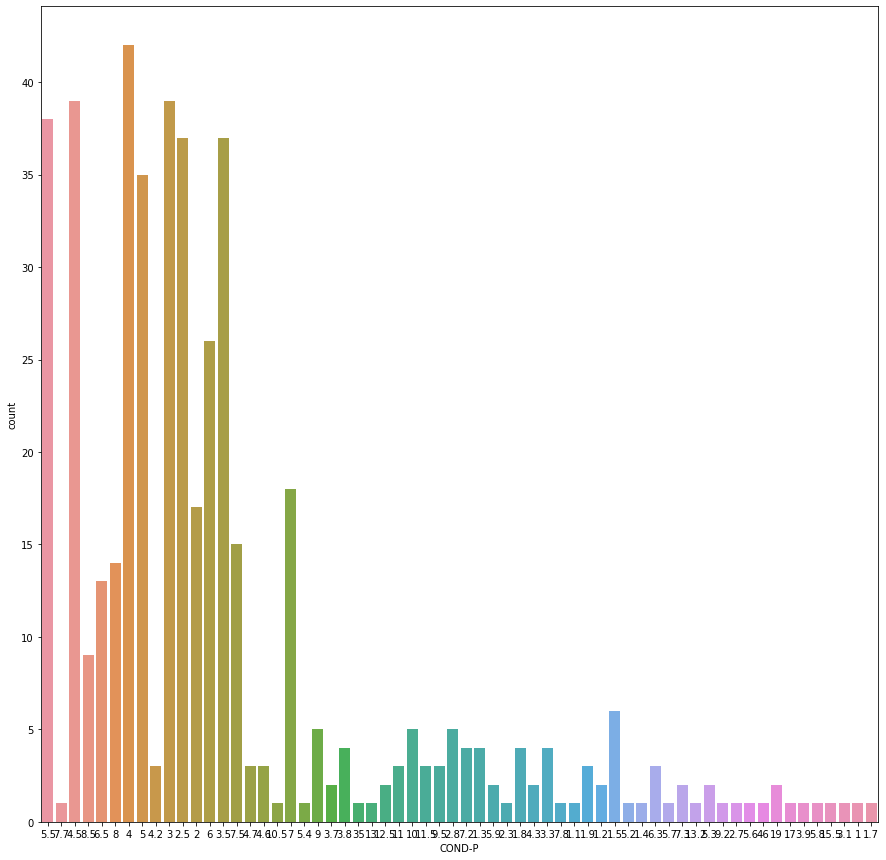

In [17]:
plt.figure(figsize=(15,15))
sns.countplot(x="COND-P",data=df)             
plt.show()

<AxesSubplot:xlabel='DBO-E', ylabel='ZN-E'>

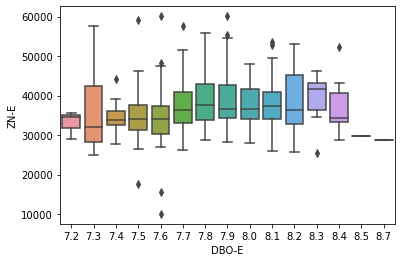

In [19]:
sns.boxplot(x="DBO-E",y="ZN-E",data=df)   

In [20]:
df.drop_duplicates(subset=None, keep='first', inplace=False)

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G,Column1
0,D-1/3/90,44101.0,1.5,7.8,NaN,407,166.0,66.3,4.5,2110,...,2000.0,NaN,58.8,95.5,NaN,70,NaN,79.4,87.3,99.6
1,D-2/3/90,39024.0,3,7.7,NaN,443,214.0,69.2,6.5,2660,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100
2,D-4/3/90,32229.0,5,7.6,NaN,528,186.0,69.9,3.4,1666,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,D-5/3/90,35023.0,3.5,7.9,205,588,192.0,65.6,4.5,2430,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924.0,1.5,8.0,242,496,176.0,64.8,4,2110,...,2120.0,NaN,62.7,95.6,NaN,71,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,D-26/8/91,32723.0,0.16,7.7,93,252,176.0,56.8,2.3,894,...,942.0,NaN,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535.0,0.32,7.8,192,346,172.0,68.6,4,988,...,950.0,NaN,58.3,97.8,83,59.1,91.1,74.6,90.7,100
524,D-28/8/91,32922.0,0.3,7.4,139,367,180.0,64.4,3,1060,...,1136.0,NaN,65,97.1,76.2,66.4,82,77.1,88.9,99
525,D-29/8/91,32190.0,0.3,7.3,200,545,258.0,65.1,4,1260,...,1326.0,39.8,65.9,97.1,81.7,70.9,89.5,87,89.5,99.8


In [21]:
df.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G,Column1
0,D-1/3/90,44101.0,1.5,7.8,NaN,407,166.0,66.3,4.5,2110,...,2000.0,NaN,58.8,95.5,NaN,70,NaN,79.4,87.3,99.6
1,D-2/3/90,39024.0,3,7.7,NaN,443,214.0,69.2,6.5,2660,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100
2,D-4/3/90,32229.0,5,7.6,NaN,528,186.0,69.9,3.4,1666,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,D-5/3/90,35023.0,3.5,7.9,205,588,192.0,65.6,4.5,2430,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924.0,1.5,8.0,242,496,176.0,64.8,4,2110,...,2120.0,NaN,62.7,95.6,NaN,71,92.1,78.2,87.5,99.5


In [24]:
from sklearn.datasets import make_blobs
raw_data = make_blobs(n_samples = 526, n_features = 2, centers = 4, cluster_std = 1.8)

In [25]:
raw_data

(array([[ 0.28883144,  8.96676114],
        [ 2.65904126,  0.53198885],
        [-0.06126954, -1.34075468],
        ...,
        [ 3.0628044 ,  8.58149545],
        [-2.45285772,  3.01451681],
        [-2.83260422,  6.48811706]]),
 array([1, 0, 0, 2, 1, 2, 0, 2, 1, 0, 1, 3, 2, 0, 1, 1, 3, 3, 2, 1, 1, 2,
        2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 3, 0, 3, 3, 1, 2, 3, 1, 0, 1,
        3, 2, 3, 0, 3, 2, 0, 0, 0, 1, 0, 3, 2, 0, 0, 3, 0, 3, 0, 2, 0, 1,
        1, 3, 3, 3, 3, 0, 3, 1, 1, 1, 3, 1, 3, 2, 2, 2, 1, 0, 0, 1, 3, 3,
        0, 1, 0, 3, 2, 1, 3, 3, 1, 1, 2, 2, 1, 1, 1, 0, 3, 2, 2, 3, 3, 2,
        2, 2, 2, 1, 3, 3, 3, 3, 3, 0, 0, 2, 0, 3, 1, 2, 3, 3, 0, 3, 2, 3,
        0, 2, 3, 3, 2, 1, 3, 1, 2, 0, 2, 1, 0, 2, 3, 3, 2, 0, 1, 3, 1, 2,
        0, 2, 0, 3, 3, 1, 2, 1, 2, 0, 3, 3, 3, 0, 1, 3, 3, 2, 1, 3, 1, 1,
        0, 0, 0, 2, 3, 3, 1, 0, 3, 3, 3, 2, 1, 0, 0, 0, 3, 3, 2, 2, 1, 1,
        0, 2, 1, 2, 0, 2, 0, 0, 2, 2, 0, 3, 0, 1, 2, 0, 1, 1, 0, 3, 0, 0,
        0, 2, 1, 3, 3, 2, 2, 

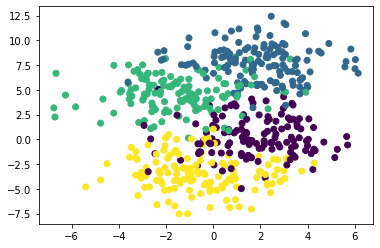

In [26]:
plt.scatter(raw_data[0][:,0], raw_data[0][:,1], c=raw_data[1])
plt.show()

In [27]:
model = KMeans(n_clusters=4)

In [28]:
raw_data[0]


array([[ 0.28883144,  8.96676114],
       [ 2.65904126,  0.53198885],
       [-0.06126954, -1.34075468],
       ...,
       [ 3.0628044 ,  8.58149545],
       [-2.45285772,  3.01451681],
       [-2.83260422,  6.48811706]])

In [29]:
model.fit(raw_data[0])

KMeans(n_clusters=4)

In [30]:
model.labels_

array([0, 3, 1, 2, 0, 2, 2, 2, 0, 3, 0, 1, 2, 3, 0, 0, 1, 3, 2, 0, 0, 2,
       2, 2, 2, 2, 3, 1, 0, 3, 2, 3, 0, 3, 1, 3, 1, 1, 0, 2, 3, 0, 3, 0,
       1, 2, 3, 3, 1, 2, 3, 2, 2, 0, 2, 1, 0, 3, 3, 1, 3, 1, 3, 2, 3, 0,
       0, 1, 1, 1, 1, 3, 1, 0, 0, 0, 1, 2, 1, 2, 2, 2, 0, 3, 1, 0, 1, 1,
       3, 0, 3, 1, 2, 0, 1, 3, 0, 0, 2, 2, 0, 0, 0, 3, 1, 2, 3, 1, 3, 2,
       2, 2, 2, 0, 1, 1, 3, 3, 1, 3, 3, 2, 3, 3, 0, 0, 3, 1, 3, 3, 2, 1,
       3, 2, 1, 1, 2, 0, 1, 0, 2, 3, 2, 0, 3, 3, 1, 1, 2, 3, 0, 1, 0, 2,
       2, 2, 3, 1, 1, 0, 2, 0, 2, 3, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0,
       3, 3, 3, 0, 1, 1, 0, 3, 1, 1, 1, 2, 0, 1, 3, 1, 1, 1, 2, 3, 0, 0,
       1, 2, 0, 2, 0, 0, 3, 3, 2, 2, 3, 1, 3, 0, 3, 3, 2, 0, 3, 1, 3, 3,
       1, 2, 0, 1, 1, 2, 2, 0, 3, 0, 3, 2, 3, 2, 1, 0, 0, 2, 0, 1, 1, 2,
       0, 0, 1, 3, 1, 1, 3, 2, 1, 2, 2, 1, 1, 3, 1, 2, 0, 0, 0, 1, 1, 0,
       3, 3, 3, 2, 1, 0, 0, 3, 2, 0, 3, 2, 1, 3, 2, 1, 1, 0, 2, 1, 3, 3,
       1, 1, 0, 3, 1, 2, 0, 2, 1, 1, 2, 1, 0, 0, 2,

In [31]:
model.cluster_centers_


array([[ 2.25416189,  7.68339304],
       [-0.80587506, -3.62352496],
       [-1.77054786,  4.67631135],
       [ 1.99022676,  0.05640052]])

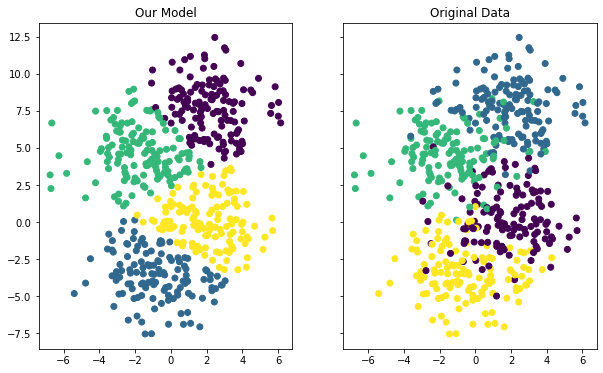

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.set_title('Our Model')

ax1.scatter(raw_data[0][:,0], raw_data[0][:,1],c=model.labels_)

ax2.set_title('Original Data')

ax2.scatter(raw_data[0][:,0], raw_data[0][:,1],c=raw_data[1])
plt.show()

In [33]:
raw_data1 = make_blobs(n_samples = 526, n_features = 2)

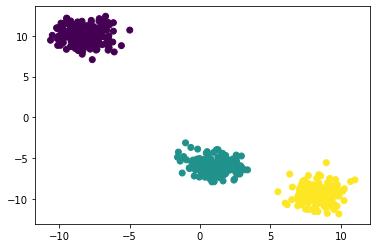

In [34]:
plt.scatter(raw_data1[0][:,0], raw_data1[0][:,1], c=raw_data1[1])
plt.show()

In [35]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit(raw_data1[0])

KMeans(n_clusters=5)

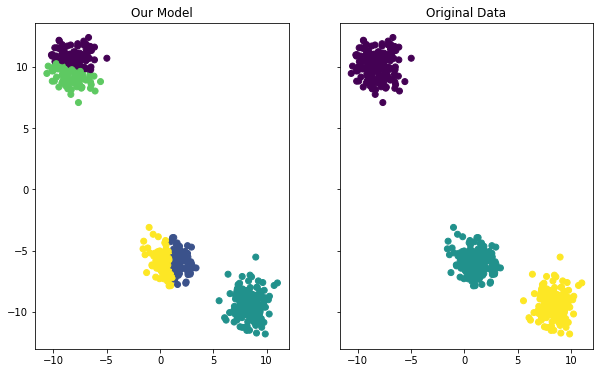

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.set_title('Our Model')

ax1.scatter(raw_data1[0][:,0], raw_data1[0][:,1],c=model.labels_)

ax2.set_title('Original Data')

ax2.scatter(raw_data1[0][:,0], raw_data1[0][:,1],c=raw_data1[1])
plt.show()

C:\Users\Raj-Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


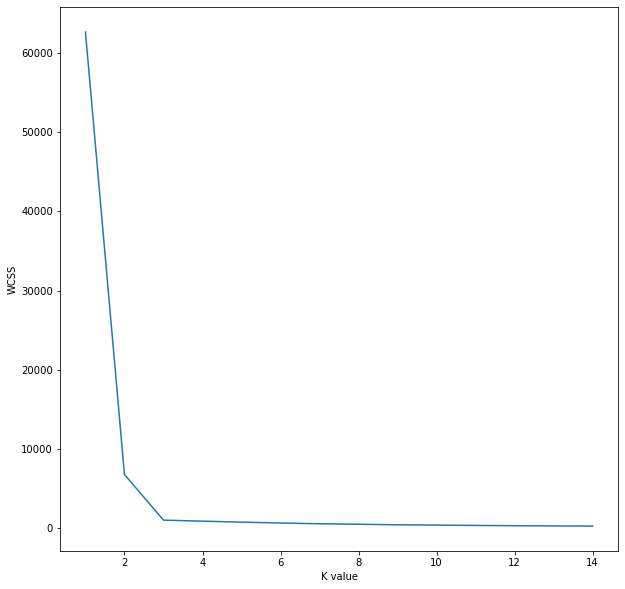

In [37]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(raw_data1[0])
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

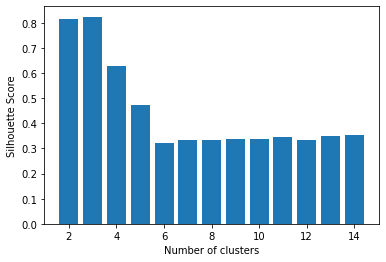

In [38]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2,15):
    silhouette_scores.append( 
        silhouette_score(raw_data1[0], KMeans(n_clusters = n_cluster).fit_predict(raw_data1[0]))) 
    

k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [39]:
model1 = KMeans(n_clusters=3)
model1.fit(raw_data1[0])

KMeans(n_clusters=3)

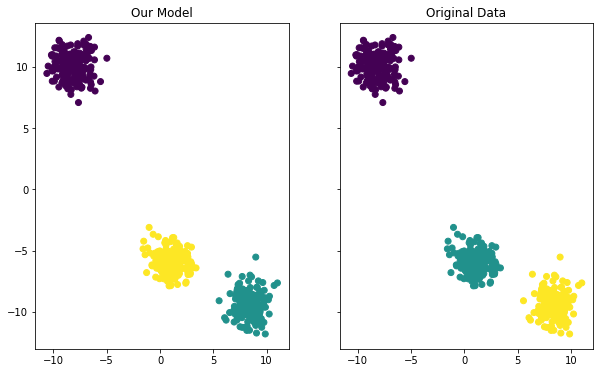

In [40]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.set_title('Our Model')

ax1.scatter(raw_data1[0][:,0], raw_data1[0][:,1],c=model1.labels_)

ax2.set_title('Original Data')

ax2.scatter(raw_data1[0][:,0], raw_data1[0][:,1],c=raw_data1[1])
plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 0 to 526
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q-E       507 non-null    object 
 1   ZN-E      507 non-null    float64
 2   PH-E      504 non-null    object 
 3   DBO-E     507 non-null    float64
 4   DQO-E     484 non-null    object 
 5   SS-E      501 non-null    object 
 6   SSV-E     507 non-null    float64
 7   SED-E     496 non-null    object 
 8   COND-E    482 non-null    object 
 9   PH-P      507 non-null    int64  
 10  DBO-P     507 non-null    float64
 11  SS-P      467 non-null    object 
 12  SSV-P     507 non-null    int64  
 13  SED-P     496 non-null    object 
 14  COND-P    483 non-null    object 
 15  PH-D      507 non-null    int64  
 16  DBO-D     507 non-null    float64
 17  DQO-D     480 non-null    object 
 18  SS-D      500 non-null    object 
 19  SSV-D     506 non-null    object 
 20  SED-D     495 non-null    object

In [45]:
df["SS-E"] = pd.to_numeric(df["SS-E"])

C:\Users\RAJ-LE~1\AppData\Local\Temp/ipykernel_24280/3608601334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SS-E"] = pd.to_numeric(df["SS-E"])


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 0 to 526
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q-E       507 non-null    object 
 1   ZN-E      507 non-null    float64
 2   PH-E      504 non-null    object 
 3   DBO-E     507 non-null    float64
 4   DQO-E     484 non-null    object 
 5   SS-E      501 non-null    float64
 6   SSV-E     507 non-null    float64
 7   SED-E     496 non-null    object 
 8   COND-E    482 non-null    object 
 9   PH-P      507 non-null    int64  
 10  DBO-P     507 non-null    float64
 11  SS-P      467 non-null    object 
 12  SSV-P     507 non-null    int64  
 13  SED-P     496 non-null    object 
 14  COND-P    483 non-null    object 
 15  PH-D      507 non-null    int64  
 16  DBO-D     507 non-null    float64
 17  DQO-D     480 non-null    object 
 18  SS-D      500 non-null    object 
 19  SSV-D     506 non-null    object 
 20  SED-D     495 non-null    object

In [47]:
df["PH-E"] = pd.to_numeric(df["PH-E"])

C:\Users\RAJ-LE~1\AppData\Local\Temp/ipykernel_24280/2389143394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PH-E"] = pd.to_numeric(df["PH-E"])


In [48]:
df["DQO-E"] = pd.to_numeric(df["DQO-E"])

C:\Users\RAJ-LE~1\AppData\Local\Temp/ipykernel_24280/223935255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DQO-E"] = pd.to_numeric(df["DQO-E"])


In [49]:
df["SED-E"] = pd.to_numeric(df["SED-E"])

C:\Users\RAJ-LE~1\AppData\Local\Temp/ipykernel_24280/2365950709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SED-E"] = pd.to_numeric(df["SED-E"])


In [50]:
df["COND-E"] = pd.to_numeric(df["COND-E"])

C:\Users\RAJ-LE~1\AppData\Local\Temp/ipykernel_24280/2815259319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["COND-E"] = pd.to_numeric(df["COND-E"])


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 0 to 526
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q-E       507 non-null    object 
 1   ZN-E      507 non-null    float64
 2   PH-E      504 non-null    float64
 3   DBO-E     507 non-null    float64
 4   DQO-E     484 non-null    float64
 5   SS-E      501 non-null    float64
 6   SSV-E     507 non-null    float64
 7   SED-E     496 non-null    float64
 8   COND-E    482 non-null    float64
 9   PH-P      507 non-null    int64  
 10  DBO-P     507 non-null    float64
 11  SS-P      467 non-null    object 
 12  SSV-P     507 non-null    int64  
 13  SED-P     496 non-null    object 
 14  COND-P    483 non-null    object 
 15  PH-D      507 non-null    int64  
 16  DBO-D     507 non-null    float64
 17  DQO-D     480 non-null    object 
 18  SS-D      500 non-null    object 
 19  SSV-D     506 non-null    object 
 20  SED-D     495 non-null    object

In [59]:
data_pol=df.groupby('Q-E',as_index=False)[['ZN-E','DBO-E','PH-E','DQO-E','SS-E','SSV-E','PH-P']].agg(np.sum)
data_pol.head()

,Q-E,ZN-E,DBO-E,PH-E,DQO-E,SS-E,SSV-E,PH-P
0,D-1/1/90,41230.0,7.6,0.35,120.0,344.0,136.0,993
1,D-1/1/91,32441.0,8.1,0.80,198.0,351.0,134.0,1341
2,D-1/10/90,47623.0,7.7,3.40,283.0,310.0,170.0,1065
3,D-1/10/91,32208.0,7.6,0.54,145.0,258.0,194.0,985
4,D-1/11/90,45006.0,8.0,5.20,0.0,182.0,134.0,1007


In [60]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
data_num=data_pol.drop("Q-E",axis=1)

In [61]:
scaler.fit(data_num)

StandardScaler()

In [62]:
X_scaled_array = scaler.transform(data_num)
X_scaled_array

array([[ 0.60019328, -0.90569311, -0.72218014, ..., -0.45012112,
        -0.66734992, -1.2179824 ],
       [-0.726299  ,  1.1701948 , -0.56004937, ..., -0.39536227,
        -0.68184013, -0.3386452 ],
       [ 1.56506587, -0.49051553,  0.37670622, ..., -0.71609266,
        -0.42101634, -1.03605057],
       ...,
       [ 1.04950123, -0.07533794, -0.41593312, ..., -1.67046115,
        -0.84123244, -1.12196282],
       [-0.96672479, -0.49051553, -0.77622373, ..., -0.19979496,
        -0.60938908, -1.35190445],
       [ 0.9242323 , -0.90569311,  1.4936071 , ..., -1.57658884,
        -0.37754571, -1.55657777]])

In [63]:
data_scaled = pd.DataFrame(X_scaled_array, columns = data_num.columns)

print (data_scaled.head(5))

       ZN-E     DBO-E      PH-E     DQO-E      SS-E     SSV-E      PH-P
0  0.600193 -0.905693 -0.722180 -0.835985 -0.450121 -0.667350 -1.217982
1 -0.726299  1.170195 -0.560049  0.236343 -0.395362 -0.681840 -0.338645
2  1.565066 -0.490516  0.376706  1.404906 -0.716093 -0.421016 -1.036051
3 -0.761465 -0.905693 -0.653725 -0.492290 -1.122873 -0.247134 -1.238197
4  1.170091  0.755017  1.025229 -2.485721 -1.717397 -0.681840 -1.182607


In [64]:
def scale(x):
    return (x-np.mean(x))/np.std(x)
data_num=data_pol.drop("Q-E",axis=1)

In [65]:
data_num

,ZN-E,DBO-E,PH-E,DQO-E,SS-E,SSV-E,PH-P
0,41230.0,7.6,0.35,120.0,344.0,136.0,993
1,32441.0,8.1,0.80,198.0,351.0,134.0,1341
2,47623.0,7.7,3.40,283.0,310.0,170.0,1065
3,32208.0,7.6,0.54,145.0,258.0,194.0,985
4,45006.0,8.0,5.20,0.0,182.0,134.0,1007
...,...,...,...,...,...,...,...
502,39590.0,7.8,5.00,144.0,361.0,220.0,1790
503,32334.0,7.6,19.10,179.0,461.0,298.0,1340
504,44207.0,7.8,1.20,70.0,188.0,112.0,1031
505,30848.0,7.7,0.20,142.0,376.0,144.0,940


In [66]:
data_scaled=data_num.apply(scale,axis=1)

In [67]:
data_scaled.head()

,ZN-E,DBO-E,PH-E,DQO-E,SS-E,SSV-E,PH-P
0,2.448885,-0.426228,-0.426733,-0.418388,-0.402765,-0.417272,-0.357499
1,2.447703,-0.437369,-0.438019,-0.420477,-0.406867,-0.426170,-0.318801
2,2.448995,-0.426210,-0.426469,-0.409586,-0.407955,-0.416409,-0.362366
3,2.448546,-0.431112,-0.431744,-0.418825,-0.408719,-0.414443,-0.343704
4,2.448943,-0.421855,-0.422033,-0.422365,-0.410754,-0.413816,-0.358120


In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [69]:
Z=linkage(data_scaled,method="ward")

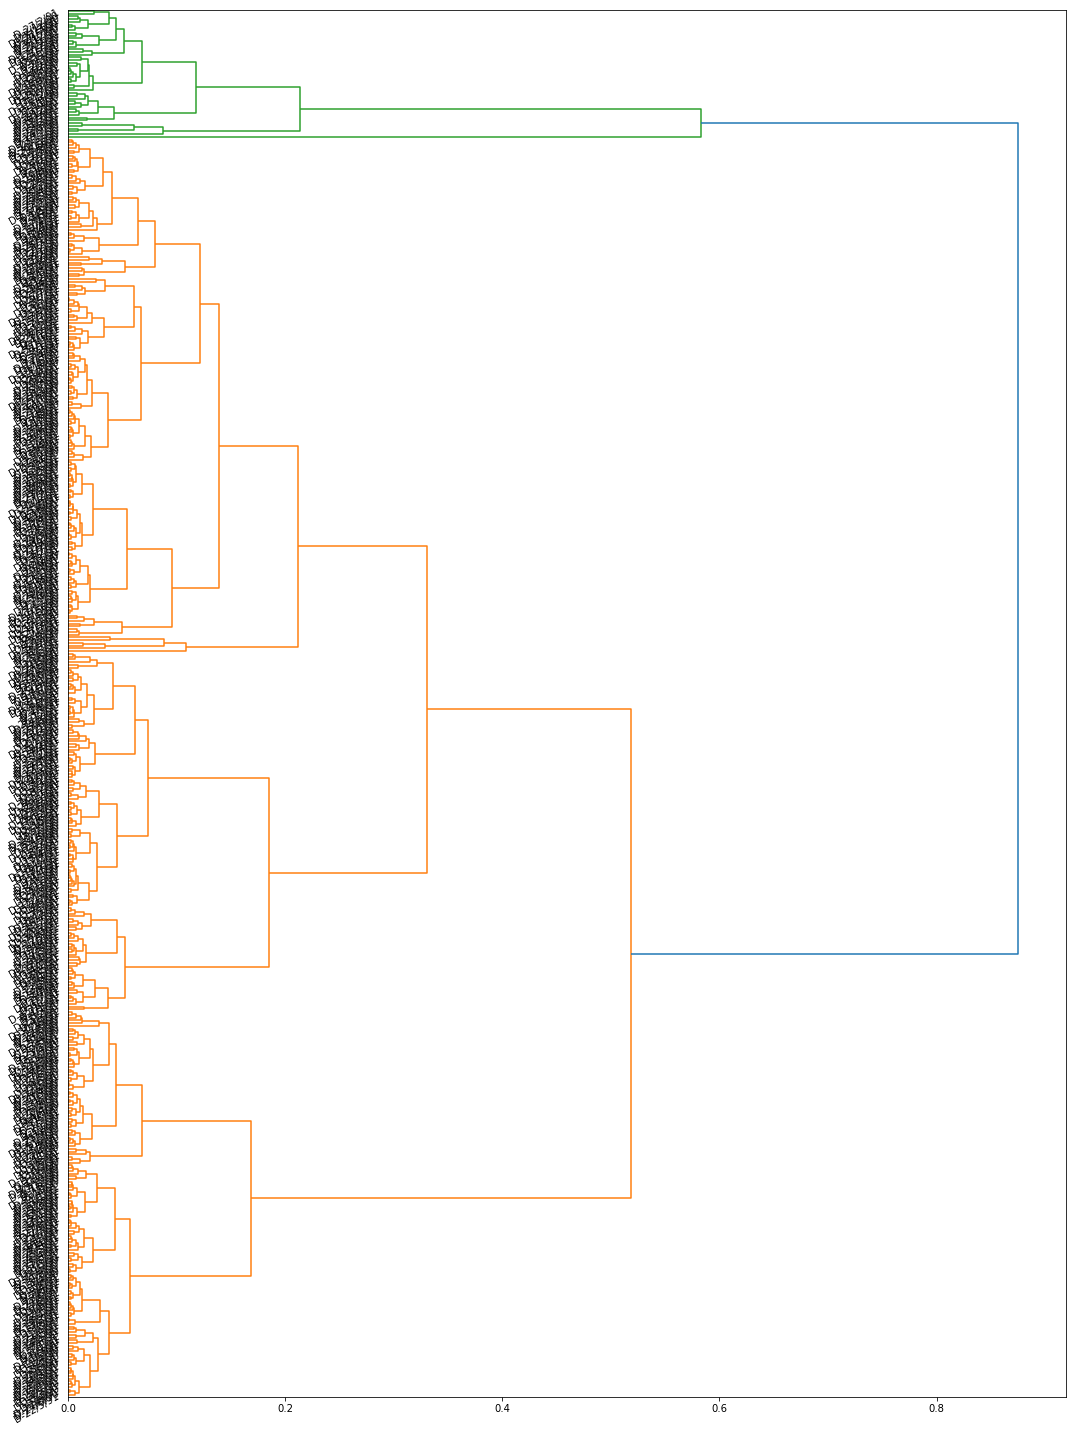

In [79]:
fig, ax = plt.subplots(figsize=(15, 20))
ax=dendrogram(Z,orientation="right",labels=np.array(data_pol['Q-E']),leaf_rotation=30,leaf_font_size=10)
plt.tight_layout()
plt.show()